
# Modeling House and Rent Prices Using Neighborhood Factors across the US
Anna Zhong, Austin Wu, Cody He, and Eliza Hale for <b>CS109</b>

<img src="website/images/sanfrancisco_houses3.jpg">

## Contents

<a href="#project_overview">1. Project Overview</a>

- <a href="#project_overview">Background and Motivation</a>
- <a href="#project_overview">Questions</a>
- <a href="#project_overview">Our Approach</a>

<a href="#data">2. Data</a>

- <a href="#data">2.1 House and Rental Price Data</a>
- <a href="#dem_data">2.2 Demographic Data</a>
- <a href="#biz_data">2.3 Business Data</a>
- <a href="#yelp_data">2.4 Yelp Data</a>

<a href="#exploration">3. Exploratory Analysis<a/>

- <a href="#exploration">3.1 Neighborhood Trends in Demographic and Business Type</a>
- <a href="#exploration_price">3.2 Price Trends</a>

<a href="#modeling">4. Modeling</a>
- <a href="#modeling">4.1 Model Features</a>
- <a href="#model_train">4.2 Train/Test Data</a>
- <a href="#baseline">4.3 Baseline Prediction</a>
- <a href="#regression">4.4 Regression (and other models)</a>

<a href="#conclusion">5. Conclusion</a>

<a id="project_overview"></a>
# 1. Project Overview

## Background and Motivation
Provide an overview of the project goals and the motivation for it. Consider that this will be read by people who did not see your project proposal.

## Questions

Initially we were interested in looking at changes in housing prices across the US from 2000 to 2010, and how differences in demographic and business features between regions might be able to predict the change in housing prices. First, we had to make a decision about the granularity of our data in terms of geographic divisions.  Did we want to look as neighborhoods within a specific city?  Or look at each city, county, or zipcode in the US? We chose to perform our analysis at the zipcode level in order to maximize the sample size for our regression and to eliminate the intra-region heterogeneity that exists with larger geographies. 


## Our Approach
We initially retrieved zipcode-level data for median house price per square foot across the united state from Zillow, a real estate database company. We planned to use For our predictors, we aggregated data from a variety of sources. Initially, we used 2010 census data which detailed zipcode-level demographic data. As we iterated through various regression models, we sought to improve our models by adding new predictors to our regression. We aggregated jail data and prison indicator variables (i.e. whether or not there is a jail in a zipcode) from enigma.io, median income data, number of businesses, from Yelp.  We also. We also built a python script that would allow us to use features from Census data that only existed at the county level and mapped the values to the corresonding zipcodes within the county. We gathered our predictors and merged them with the housing price data by zipcode.

We first regressed census data along with jail/prison data on change in housing prices from 2000 to 2010. Our first model had very low explanatory power, so we sought more features. However, as we thought about the story we wanted to tell, we started thinking that examining other response variables might lend to more interesting and easily interpretable conclusions. We looked at a Zillow metric for home values that accounts for some biases that come with using their raw house price data. We also eventually looked at price-to-rent ratio.
With regards to gathering and organizing our data, some of our data, like the 2010 census data and the Zillow real estate data, we were able to download tables that we converted to pandas and cleaned by dropping the NANs in the years we wished to analyze and other miscellenaeous modifications. We stored our pandas dataframes by pickling them.
For Yelp we randomly sampled zipcodes, grabbed businesses in categories in active, arts, education, nightlife, pets, shopping, restaurants, took proportion of busineseses in each category to get businesses, transformed data, made binary indicator variables.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

<a id="data"></a>
# 2. Data

<a id="data"></a>
## 2.1 House and Rental Price Data

All of the data for our house prices and rental prices came from Zillow at http://www.zillow.com/research/data/. We had originally wanted to model the delta between price data from two points in time (2000 vs 2010). This raised several concerns:

1. Is <b>delta</b> the best information to model?
2. Which years would be the most appropriate to do our analysis on given the data available to us for features of our model?

After some exploratory analysis (simple linear regressions using our demographic data, described below) on the <b>delta</b>, we quickly saw that it would be difficult to model the change in prices on static demographic data alone (we think that it would require time series analysis, and more importantly, several years of demographic data, which was impossible to gather in this short time frame because US census data categories vary by year).

This is what led us to temporarily switch to attempting to model the housing prices alone (rather than the change in housing prices). Additional research online, on the topic of predicting housing prices, suggested that we ought to look at the ratio of housing prices to rental prices, or price to rent ratio (PTR ratio). A ratio helps illuminate whether it would be prudent to buy a house or to rent: a high ratio suggests that housing prices far exceed renting prices, so renting would be a better option, whereas a low ratio suggests that housing prices are low, and buying would be a better option.

With this in mind, we looked for rental price data from Zillow. Since Zillow only contained rental data from 2011 onward, we were limited to this in scope. With this in mind, we decided to proceed modeling the 2015 PTR ratio with a 2011 PTR baseline, along with various features from demographic and business data as well we describe in the next few sections. For both the housing prices and rental prices we used the "median price per square foot" with regard to each Zip Code to keep the scales the same.

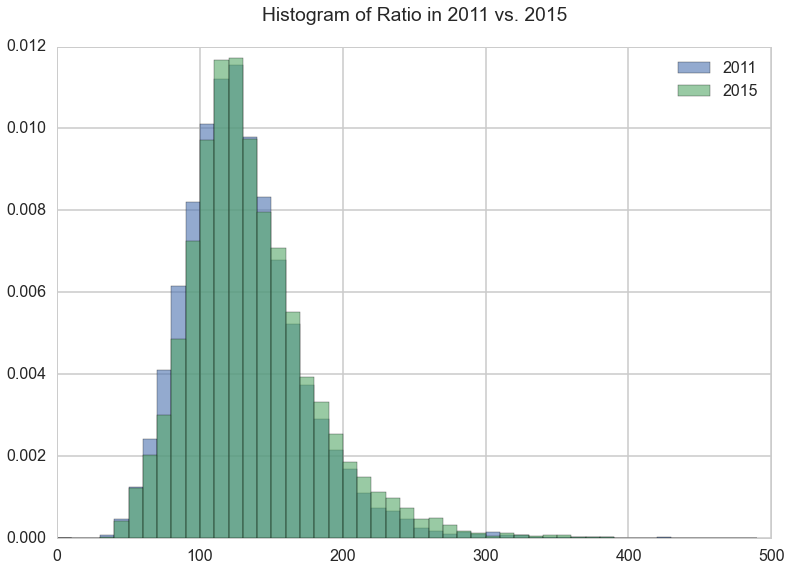

In [23]:
df = pd.read_pickle('data/housing_rental_ratio.pkl')
setbins = range(0,500,10)

plt.hist(df['ratio_2011'].dropna().tolist(), bins = setbins, normed=True, alpha=0.6, label='2011');
plt.hist(df['ratio_2015'].dropna().tolist(), bins = setbins, normed=True, alpha=0.6, label='2015');
plt.title('Histogram of PTR Ratio in 2011 vs. 2015\n');
plt.legend();

From the above histogram, t is evident that the PTR, on average, increases between 2011 and 2015. However, based on the below histogram, there is still a substantial fraction of zip codes where the PTR decreases.

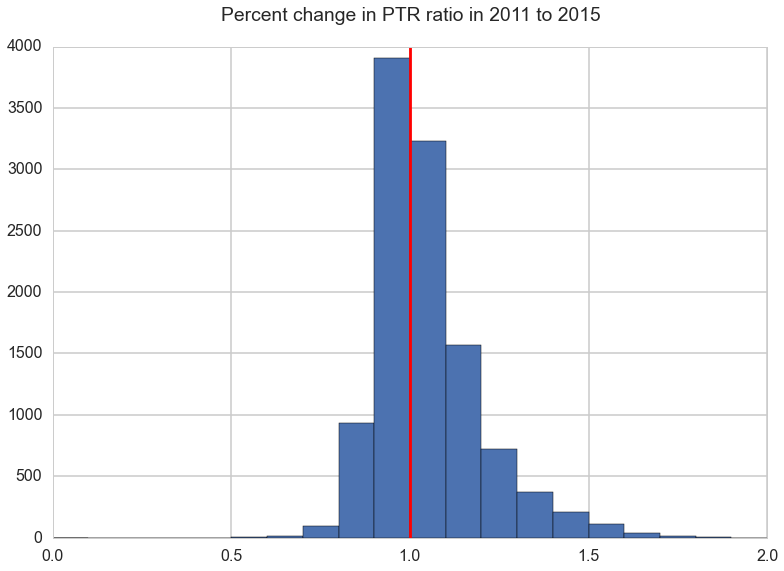

In [36]:
plt.hist(df['ratio_pct_delta'], bins=np.arange(0,2.1,0.1));
plt.axvline(x=1, color="red");
plt.title('Percent change in PTR ratio in 2011 to 2015\n');

We were interested in how the PTR ratios differed across different geographic areas in the US, and also how much heterogeneity in PTR values can exist within a small area. To make the data easier to see on a map, we aggregated the zipcode data into counties (see countyMedian.py). The more red areas below correspond to areas with lower PTR ratios, and the more blue areas are areas with higher PTR ratios.

# INCOMPLETE

Let’s take a closer look at INCOMPLETE.

#INCOMPLETE

<a id="dem_data"></a>
## 2.2 Demographic Data

To find demographic data, we took data from the 2010 Census on zipcodes across the US. This data information on demographics such as sex, age, and race. It also gave us information on household  composition: the percentage of households that have single male and female residents, the percentage of households with single mothers, percentage of households that were family households or non-family households, the percentage of households that had children or seniors, etc. We also integrated jail and prison data to provide a more complete view of the demographic distribution of the zip code.

To see precisely how files were cleaned, please take a look at the <b>Data Wrangling</b> iPython Notebook.

In [45]:
prison = pd.read_pickle('data/prison_binary.pkl').drop('state', 1).rename(columns = {'zip': 'zipcode'})
jail = pd.read_pickle('data/jail_binary.pkl').rename(columns = {'zip': 'zipcode'})
demographics = pd.read_pickle('data/cleaned_demographic_features.pkl').drop(['GEO.id', 'GEO.display-label'], 1)
demographics = demographics.rename(columns = {'GEO.id2': 'zipcode'})

There are too many demographic variables to see them all here, so to see the full documentation on the variable name encoding, please take a look at the <b>Data Wrangling</b> iPython Notebook.

In [46]:
demographics.head()

,zipcode,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012,A013,A014,A015,A016,A017,A018,A019,A020,A021,A022,A023,A024,A025,A026,A027,A028,A029,A030,A031,A032,A033,A034,A035,A036,A037,A038,A039,A040,A041,A042,A043,A044,A045,A046,A047,A048,A049,A050,A051,A052,A053,A054,A055,A056
1,00601,18570,12.8,16.2,13.9,11.7,13.3,13.1,10.2,5.7,3.1,48.9,6.6,8.5,6.9,5.4,6.3,6.3,4.9,2.7,1.3,51.1,6.3,7.7,7,6.3,6.9,6.8,5.3,2.9,1.8,93.1,3.1,0.4,0,0,99.5,77.8,5.1,2.6,20.3,9.6,20.3,10.2,3.3,10.1,5.5,39.5,29,84.3,15.7,2.9,0.5,2.84,3.27,7744,2.87
2,00602,41520,11.5,15.2,13.5,12.9,14.6,14,10.1,5.7,2.3,49.1,5.9,7.7,6.7,6.4,7,6.8,4.9,2.6,1.1,50.9,5.6,7.5,6.8,6.5,7.6,7.2,5.2,3.1,1.3,86.7,5.3,0.3,0.1,0,99.4,77.6,5.1,2.1,17.4,8,20.5,10.5,3,10,4.9,37.6,25.9,83,17,2.6,1.3,2.76,3.20,18073,2.62
3,00603,54689,12.2,14.2,13,13,12.7,12.6,12,7,3.3,48.6,6.4,7.3,6.5,6.4,6,5.8,5.6,3.2,1.4,51.4,5.8,7,6.5,6.6,6.6,6.7,6.4,3.7,2.1,82.9,7.6,0.3,0.2,0,98.5,71.1,4.7,1.7,22,10.9,26.4,12.7,4.1,13.8,6.8,34,31.1,82.5,17.5,3.6,1.5,2.53,3.06,25653,2.51
4,00606,6615,12.8,15.1,14.7,12.1,13.1,13.4,10.5,5.5,2.9,49.4,6.6,7.5,7.1,6.1,6.5,6.3,5.2,2.6,1.4,50.6,6.2,7.5,7.6,6,6.6,7,5.4,2.9,1.5,88.9,4.7,0.4,0,0.1,99.4,74.6,6.2,2.7,18.4,8.1,22.8,12.7,4.5,10.1,4.7,37.5,28.4,83.6,16.4,1.7,0.8,2.75,3.24,2877,2.83
5,00610,29016,11.8,15.1,12.6,13.4,13.9,12.6,11.2,6.7,2.8,48.6,6.2,7.7,6.4,6.6,6.5,5.9,5.1,3.2,1.1,51.4,5.6,7.5,6.2,6.9,7.4,6.7,6.1,3.5,1.7,82,7.2,0.3,0.1,0,99.2,74.4,4.9,1.9,19.9,9.4,22.8,11,3.4,11.9,5.8,36.5,29.4,85.9,14.1,1.9,0.8,2.67,3.14,12618,2.66


In [39]:
prison.head()

,zipcode,prison
0,35034,1
1,36089,1
2,35023,1
3,36025,1
4,36017,1


In [41]:
jail.head()

,zipcode,jail
0,36067,1
1,36507,1
2,36016,1
3,35034,1
4,35121,1


<a id="biz_data"></a>
## 2.3 Business Data

We also retrieved some business data from each zipcode from the US Census. This included the number of businesses within the zipcode, the size and amount of the payroll, as well as the median income of residents of each zipcode. This data was current to 2010.

To see precisely how files were cleaned, please take a look at the <b>Data Wrangling</b> iPython Notebook.

In [47]:
bus_patterns = pd.read_pickle('data/business_patterns.pkl').drop('Geographic area name', 1)
bus_patterns = bus_patterns.rename(columns = {'Number of establishments':'n_establishments'})
income = pd.read_pickle('data/medianIncome.pkl')

In [48]:
bus_patterns.head()

,n_establishments,paid_employees,first_quarter_payroll_1000,annual_payroll_1000,zipcode
1,448,9185,70693,314508,01001
2,570,15633,82069,351589,01002
3,16,168,1297,5761,01003
4,21,189,1710,7241,01004
5,96,926,5698,24382,01005


In [49]:
income.head()

,zipcode,median_income
0,00601,13318
1,00602,14947
2,00603,14437
3,00606,11155
4,00610,16367


<a id="yelp_data"></a>
## 2.4 Yelp Data

<a id="exploration"></a>
# 3. Exploratory Data Analysis

<a id="exploration"></a>
## 3.1 Neighborhood Trends in Business and Demographics

Demographic data: do a heat map of single householder and others (minority races?) 

Business data: rank industries by number of zip codes with that industry as the most popular, map out business data as well?

<a id="exploration_price"></a>
## 3.2 House and Rent Price Trends

Listing out top and bottom performers in bar charts too? Doing a quick case study in Cali?

<img src="images/PriceToRent.png">
We generated some choropleth maps using d3 to visualize what some of these metrics looked like across the country from 2011 to 2015. This is displayed on the county level, with data lacking in the white areas. With regards to price-to-rent ratio, we saw that it seemed to be getting cheaper to rent than to buy a home (as indicated by higher price-to-rent ratios) in California in 2015 compared to 2011. 

<img src="images/Delta.png">
This visualization, which shows the percentage change in the price-to-rent ratio, confirms our hypothesis about renting in California. Along with California, Michigan and the south of Florida seem to be areas where it is becoming increasingly cheaper to rent than to buy a home.

<a id="modeling"></a>
# 4. Modeling

<a id="modeling"></a>
## 4.1 Model Features

<a id="model_train"></a>
## 4.2 Test/Train Data

<a id="baseline"></a>
## 4.3 Baseline Prediction

<a id="regression"></a>
## 4.4 Regression 
Include graphs for evaluation (and all the other models we used)

<a id="conclusion"></a>
# 5. Conclusion

What were our findings?
Evaluate each model and talk about next steps.